In [1]:
import numpy as np

rgb_lookup = {
    0: (200, 200, 200),  # Nothing (empty space)
    1: (205, 23, 24),  # Red (🔴)
    2: (10,177,1),  # Green (🟢)
    3: (0,89,209),  # Blue (🔵)
    4: (255, 217, 0),  # Yellow (🟡)
    5: (170, 38, 255),  # Purple (🟣)
    6: (0, 0, 0),  # Grey (⚫️)
    7: (230, 132, 0),  # Orange (🟠)
    8: (255, 255, 255),  # White (⚪️)
    9: (122, 71, 34),  # Brown (🟤)
}

def replace_with_colors(grid: np.ndarray) -> np.ndarray:
    return np.array([[rgb_lookup[value] for value in row] for row in grid])

In [108]:
import random
import matplotlib.pyplot as plt
import numpy as np

def generate_random_shape(n):
    grid_size = n * 2
    grid = np.zeros((grid_size, grid_size), dtype=int)
    
    # Start the shape from the center of the grid
    x, y = grid_size // 2, grid_size // 2
    grid[x, y] = 1
    shape_coordinates = [(x, y)]
    
    # Directions: Up, Down, Left, Right
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    
    while len(shape_coordinates) < n:
        # Pick a random square already in the shape
        random_square = random.choice(shape_coordinates)
        x, y = random_square
        
        # Pick a random direction
        dx, dy = random.choice(directions)
        new_x, new_y = x + dx, y + dy
        
        # Ensure the new square is within grid bounds and not already part of the shape
        if 0 <= new_x < grid_size and 0 <= new_y < grid_size and grid[new_x, new_y] == 0:
            grid[new_x, new_y] = 1
            shape_coordinates.append((new_x, new_y))

    # Reduce the grid to the size of the shape
    min_row, min_col = np.min(shape_coordinates, axis=0)
    max_row, max_col = np.max(shape_coordinates, axis=0)
    grid = grid[min_row:max_row+1, min_col:max_col+1]

    return grid

def is_rotationable(grid):
    degrees = [0, 90, 180, 270]
    for d1 in degrees:
        for d2 in degrees:
            if d1 == d2:
                continue
            if np.array_equal(np.rot90(grid, d1), np.rot90(grid, d2)):
                return False
    return True

def generate_rotationable_shape(n):
    """
    Generates a random shape where one can distinguish between rotations
    """
    grid = generate_random_shape(n)
    i = 0
    while not is_rotationable(grid):
        grid = generate_random_shape(n)
        print(i)
        i += 1
        input()
        if i > 1000:
            raise Exception("Failed to generate a rotationable shape")

    return grid

def plot_shape(grid):
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap="Greys", interpolation='none')
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Example usage
n = 10  # Define the size of the shape
random_shape_grid = generate_rotationable_shape(10)
print(random_shape_grid)
plot_shape(random_shape_grid)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Exception: Failed to generate a rotationable shape

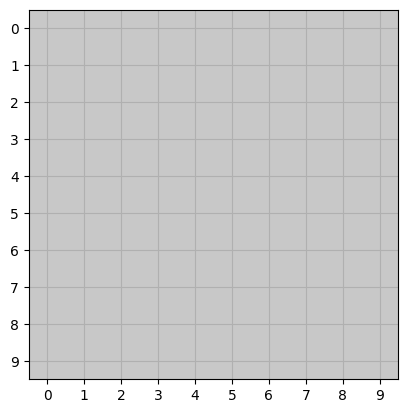

In [7]:
from matplotlib import pyplot as plt

n = 10
grid = np.zeros((n, n))
shape = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
colored_grid = replace_with_colors(grid)

plt.imshow(colored_grid)
plt.grid(True)
plt.xticks(np.arange(0, n, 1))
plt.yticks(np.arange(0, n, 1))
plt.show()


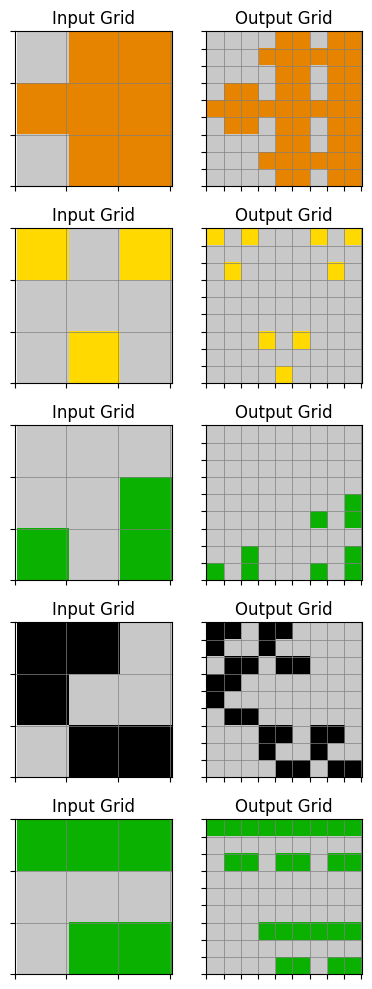

In [96]:
from matplotlib import pyplot as plt

example_id = "007bbfb7"

# Function to visualize grid with color scheme
def visualize_grids_with_colors(grids: list[dict[str, list[list[int]]]]):
    n_grids = len(grids)
    fig, axes = plt.subplots(n_grids, 2, figsize=(4, n_grids * 2))
    
    if n_grids == 1:
        axes = [axes]
    
    for i, grid in enumerate(grids):
        input_grid = np.array(grid['input'])
        output_grid = np.array(grid['output'])
        
        # Replace input and output grids with color values
        input_grid_colored = replace_with_colors(input_grid)
        output_grid_colored = replace_with_colors(output_grid)
        
        # Plot input grid
        axes[i][0].imshow(input_grid_colored, interpolation='nearest')
        axes[i][0].set_title('Input Grid')
        axes[i][0].axis('on')
        axes[i][0].grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
        axes[i][0].set_xticks(np.arange(-0.55, input_grid.shape[1], 1))
        axes[i][0].set_yticks(np.arange(-0.5, input_grid.shape[0], 1))
        axes[i][0].set_xticklabels([])
        axes[i][0].set_yticklabels([])
        
        # Plot output grid
        axes[i][1].imshow(output_grid_colored, interpolation='nearest')
        axes[i][1].set_title('Output Grid')
        axes[i][1].axis('on')
        axes[i][1].grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
        axes[i][1].set_xticks(np.arange(-0.55, output_grid.shape[1], 1))
        axes[i][1].set_yticks(np.arange(-0.5, output_grid.shape[0], 1))
        axes[i][1].set_xticklabels([])
        axes[i][1].set_yticklabels([])
    
    plt.tight_layout()
    plt.show()

# Example usage with colored grids
visualize_grids_with_colors(challenges[example_id]['train'])

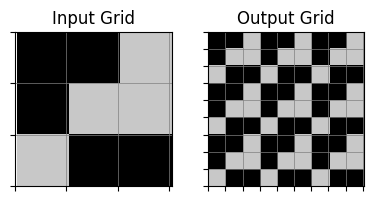

In [110]:
import numpy as np
def transform(input_grid: np.ndarray) -> np.ndarray:
    # Determine the size of the output grid
    n_rows, n_cols = input_grid.shape
    output_rows, output_cols = n_rows * 3, n_cols * 3
    output_grid = np.zeros((output_rows, output_cols), dtype=int)
    
    # Map the input grid to specific positions in the output grid
    # This mapping will be based on observed patterns in demos - essentially known zones
    def place_shape(i, j, base_pattern, pattern):
        # Insert input pattern centered in each designated spot
        n_pattern_rows, n_pattern_cols = base_pattern.shape
        offset_r = i * 3
        offset_c = j * 3
        for r in range(n_pattern_rows):
            for c in range(n_pattern_cols):
                if base_pattern[r, c] != 0:
                    output_grid[(offset_r + r) % output_rows, (offset_c + c) % output_cols] = pattern[r, c]

    # Define target mapped blocks per each 9x9 system, 
    # which segments relate directly to the 3x3 input region
    for i in range(3):
        for j in range(3):
            place_shape(i, j, input_grid, input_grid)
    
    return output_grid



input_grid =np.array(challenges[example_id]['train'][3]['input'])
transformed_grid = transform(input_grid)
visualize_grids_with_colors([{'input': input_grid, 'output': transformed_grid}])

In [23]:
find_contiguous_shapes(input_grid, 6)

[array([[4, 7],
        [5, 6],
        [5, 7]]),
 array([[4, 9]]),
 array([[8, 0],
        [8, 1],
        [9, 0],
        [9, 1]])]

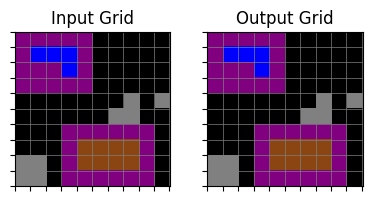

In [17]:

from scipy.ndimage import label

def find_contiguous_shapes(grid, color):
    labeled_array, num_features = label(grid == color)
    shapes = []
    for i in range(1, num_features + 1):
        shapes.append(np.argwhere(labeled_array == i))
    return shapes

def transform(grid: np.ndarray) -> np.ndarray:
    grey_color = 5
    black_color = 0

    # Find all grey outlines
    grey_shapes = find_contiguous_shapes(grid, grey_color)

    for grey_shape in grey_shapes:
        # Find the bounding box of the grey outline
        min_row, min_col = np.min(grey_shape, axis=0)
        max_row, max_col = np.max(grey_shape, axis=0)

        # Find the black cells inside the grey outline
        black_shape = np.argwhere(grid[min_row:max_row+1, min_col:max_col+1] == black_color)

        # Adjust the coordinates to the original grid
        black_shape += [min_row, min_col]

        # Find the shape that matches the black shape
        for color in range(1, 10):
            if color == grey_color or color == black_color:
                continue
            color_shapes = find_contiguous_shapes(grid, color)
            if len(color_shapes) > 1:
                # discard multiple disconnected shapes
                continue
            if len(color_shapes) == 0:
                continue

            color_shape = color_shapes[0]
            # this shape should be the same shape as the black shape
            if np.array_equal(np.diff(np.sort(black_shape, axis=0), axis=0), np.diff(np.sort(color_shape, axis=0), axis=0)):
                # Move the colored shape into the grey outline
                for cell in black_shape:
                    grid[cell[0], cell[1]] = color
                # Replace the old location of the colored shape with black
                for cell in color_shape:
                    grid[cell[0], cell[1]] = black_color
                break
        else:
            assert False, "No matching shape found"

    return grid


input_grid =np.array(challenges[example_id]['train'][1]['input'])
transformed_grid = transform(input_grid)
visualize_grids_with_colors([{'input': input_grid, 'output': transformed_grid}])